In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('athletes.csv')

In [3]:
df.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [5]:
df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [6]:
missing_dob = df[df["dob"].isna()]
print(missing_dob)

             id           name nationality   sex  dob  height  weight  \
8546  663676373  Pavel Sozykin         RUS  male  NaN     NaN     NaN   

        sport  gold  silver  bronze  
8546  sailing     0       0       0  


In [7]:
# Since there is only one gap in the date of birth, I used Wikipedia to find out the athlete's date of birth.
mask = df['dob'].isna() & (df['name'] == 'Pavel Sozykin')
df.loc[mask, 'dob'] = '12/25/87'

In [8]:
df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              0
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [9]:
df['height'] = df['height'].fillna(
    df.groupby(['sport', 'sex'])['height'].transform('median')
)

In [10]:
df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              0
height           0
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [11]:
df['weight'] = df['weight'].fillna(
    df.groupby(['sport', 'sex'])['weight'].transform('median')
)

In [12]:
df.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              0
height           0
weight         286
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [13]:
df['weight'] = df['weight'].fillna(
    df.groupby('sex')['weight'].transform('median')
)

In [14]:
df.isna().sum()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoders = {}
for col in ['nationality', 'sex', 'sport']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [15]:
from sklearn.model_selection import train_test_split

In [19]:
df['total_medals'] = df['gold'] + df['silver'] + df['bronze']

In [26]:
X = df.drop(columns=['id', 'name', 'dob', 'gold', 'silver', 'bronze', 'total_medals'])
y = df['total_medals']

In [27]:
y_binary = (y > 0).astype(int)

In [39]:
y_binary

0        0
1        0
2        1
3        0
4        0
        ..
11533    0
11534    0
11535    0
11536    0
11537    0
Name: total_medals, Length: 11538, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, shuffle=True
)

In [31]:
print("Training sample size:", X_train.shape, y_train.shape)
print("Test sample size:", X_test.shape, y_test.shape)

Training sample size: (9230, 5) (9230,)
Test sample size: (2308, 5) (2308,)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
model.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
predictions = model.predict_proba(X_test)

In [42]:
predictions[:10]

array([[0.85305467, 0.14694533],
       [0.79338375, 0.20661625],
       [0.7385427 , 0.2614573 ],
       [0.78031061, 0.21968939],
       [0.84891295, 0.15108705],
       [0.88761864, 0.11238136],
       [0.80581604, 0.19418396],
       [0.81231424, 0.18768576],
       [0.85224882, 0.14775118],
       [0.83230587, 0.16769413]])

In [44]:
model.score(X_train, y_train)  # accuracy

0.8393282773564463

In [47]:
model.score(X_test, y_test)

0.8379549393414212

In [49]:
y_prob = model.predict_proba(X_test)[:, 1]

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

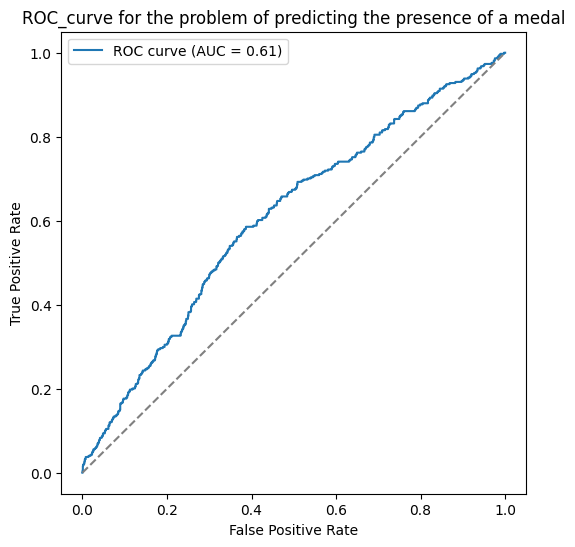

In [52]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC_curve for the problem of predicting the presence of a medal")
plt.legend()
plt.show()

In [53]:
roc_auc_score(y_test, predictions[:, 1]).round(2)

np.float64(0.61)

In [58]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:, 1], y_test):
    if predicted_prob >= 0.4:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1

    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

In [56]:
tp, fp, fn, tn

(0, 0, 374, 1934)

In [62]:
#accuracy
(tp + tn) / (tp + fp + fn + tn)

0.8379549393414212

In [63]:
precision = tp / (tp + fp)
precision

ZeroDivisionError: division by zero

In [64]:
recall = tp / (tp + fn)
recall

0.0

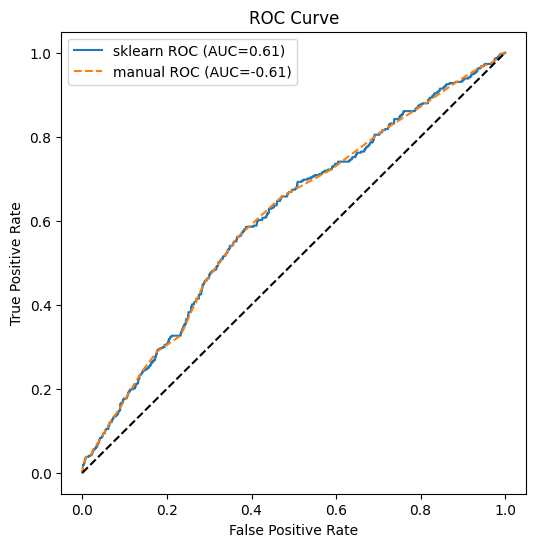

In [70]:
# ROC from sklearn
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# ROC manually (area under the curve)
auc_manual = np.trapezoid(tpr_list, fpr_list)

plt.figure(figsize=(6,6))
plt.plot(fpr_skl, tpr_skl, label=f"sklearn ROC (AUC={auc_skl:.2f})")
plt.plot(fpr_list, tpr_list, '--', label=f"manual ROC (AUC={auc_manual:.2f})")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

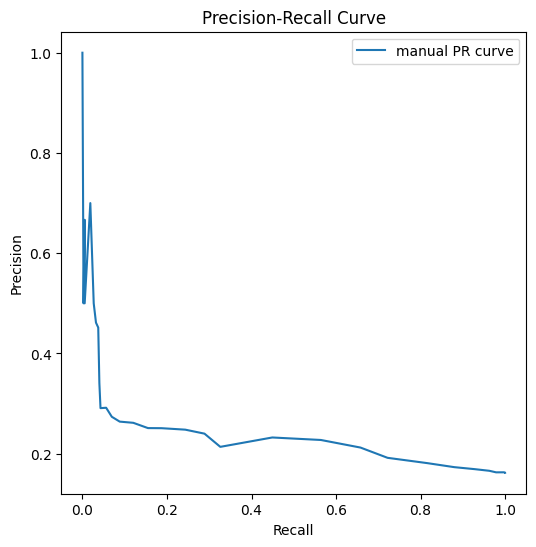

In [72]:
#Precision-Recall Curve
plt.figure(figsize=(6,6))
plt.plot(recall_list, precision_list, label="manual PR curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [74]:
print("ROC-AUC (sklearn):", auc_skl)
print("ROC-AUC (manual):", auc_manual)

ROC-AUC (sklearn): 0.60686339027479
ROC-AUC (manual): -0.6069760657859082
